Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set()
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Pre-processing

In [4]:
# loading the dataset to a pandas DataFrame
df = pd.read_csv('/content/fakereviewsdataset.csv')

In [5]:
df.shape

(40432, 4)

In [6]:
# print the first 5 rows of the dataframe
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


CG    20216
OR    20216
Name: label, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


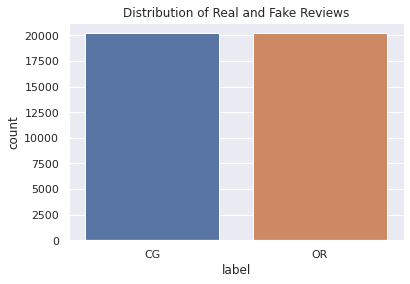

In [7]:
target = df.label.value_counts()
print(target)

sns.countplot(df.label)
plt.title("Distribution of Real and Fake Reviews")
plt.show()

In [8]:
# counting the number of missing values in the dataset
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [9]:
#merge rating & review
df['review'] = df.astype(str)['rating']+' '+df.astype(str)['text_']
print (df['review'])

0        5.0 Love this!  Well made, sturdy, and very co...
1        5.0 love it, a great upgrade from the original...
2        5.0 This pillow saved my back. I love the look...
3        1.0 Missing information on how to use it, but ...
4        5.0 Very nice set. Good quality. We have had t...
                               ...                        
40427    4.0 I had read some reviews saying that this b...
40428    5.0 I wasn't sure exactly what it would be. It...
40429    2.0 You can wear the hood by itself, wear it w...
40430    1.0 I liked nothing about this dress. The only...
40431    5.0 I work in the wedding industry and have to...
Name: review, Length: 40432, dtype: object


In [10]:
# Change the labels
df.loc[(df['label'] == "CG") , ['label']] = "FAKE"
df.loc[(df['label'] == "OR") , ['label']] = "REAL"

In [11]:
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    FAKE
3    FAKE
4    FAKE
Name: label, dtype: object

In [12]:
# separating the data & label
x = df['review'].values
y = df['label'].values
print (x)
print (y)

['5.0 Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty'
 "5.0 love it, a great upgrade from the original.  I've had mine for a couple of years"
 '5.0 This pillow saved my back. I love the look and feel of this pillow.'
 ...
 '2.0 You can wear the hood by itself, wear it with the hood, or wear just the jacket without the hood.  How is that for 3-in-1 systems?\n\nReminiscent of what Lands End sells as a "Squall Jacket", or what uniform and corporate wear sellers call a Three Season Jacket.\n\nWater and wind resistant shell.  Microfleece lined body.  Smooth polyester lining in sleeves.  Left hand side, Napoleon style, inside pocket with a hook and loop closure.  Adjustable sleeve cuffs.  Hemline cinch cord with toggles.  Molded plastic chain style, off brand, slide fastener.\n\nPolyester insulation is spilling out due to poor quality stitching.  Item was delivered with a broken main zipper.\n\nI can wear this jacket over just a t-shirt, and expect to stay warm @

Stemming:

Stemming is the process of reducing a word to its Root word

example:
actor, actress, acting --> act

In [13]:
port_stem = PorterStemmer()

In [14]:
def stemming(review):
    stemmed_review = re.sub('[^a-zA-Z]',' ',review)
    stemmed_review = stemmed_review.lower()
    stemmed_review = stemmed_review.split()
    stemmed_review = [port_stem.stem(word) for word in stemmed_review if not word in stopwords.words('english')]
    stemmed_review = ' '.join(stemmed_review)
    return stemmed_review

In [15]:
df['review'] = df['review'].apply(stemming)

In [16]:
print(df['review'])

0                love well made sturdi comfort love pretti
1                 love great upgrad origin mine coupl year
2                   pillow save back love look feel pillow
3                      miss inform use great product price
4                      nice set good qualiti set two month
                               ...                        
40427    read review say bra ran small order two band c...
40428    sure exactli would littl larg small size think...
40429    wear hood wear hood wear jacket without hood s...
40430    like noth dress reason gave star order size fi...
40431    work wed industri work long day feet outsid he...
Name: review, Length: 40432, dtype: object


In [17]:
#separating the data and label
x = df['review'].values
y = df['label'].values

In [18]:
print(x)
print(y)

['love well made sturdi comfort love pretti'
 'love great upgrad origin mine coupl year'
 'pillow save back love look feel pillow' ...
 'wear hood wear hood wear jacket without hood system reminisc land end sell squall jacket uniform corpor wear seller call three season jacket water wind resist shell microfleec line bodi smooth polyest line sleev left hand side napoleon style insid pocket hook loop closur adjust sleev cuff hemlin cinch cord toggl mold plastic chain style brand slide fasten polyest insul spill due poor qualiti stitch item deliv broken main zipper wear jacket shirt expect stay warm degre fahrenheit wind foggi light drizzl would problem depend jacket go feet order get car park lot better garment featur gore tex hippora hyvent dwr jacket featur technolog hope polyest satur tri get go go bike ride check properti fenc line horseback ride motorcycl play golf pier fish lap danc pick strawberri call duck anyth els rain guess name compani degre weatherproof custom reason expect 

In [19]:
y.shape

(40432,)

In [20]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(x)

x = vectorizer.transform(x)

In [21]:
print(x)

  (0, 25364)	0.284547299950192
  (0, 22213)	0.45773233923900697
  (0, 17833)	0.4207318495755189
  (0, 13736)	0.3748943864264146
  (0, 13518)	0.4778352051146069
  (0, 4475)	0.4045075601736619
  (1, 26073)	0.2815196022107953
  (1, 24531)	0.5596672292130287
  (1, 16251)	0.430922792959497
  (1, 14617)	0.4816500260971305
  (1, 13518)	0.18870158255910824
  (1, 9627)	0.18830328428685245
  (1, 4941)	0.34463268975995237
  (2, 19943)	0.36098940205422503
  (2, 17226)	0.8254196550584214
  (2, 13518)	0.14544896067619023
  (2, 13440)	0.19669827145589205
  (2, 8007)	0.24915145380243905
  (2, 1515)	0.25777313195983215
  (3, 24591)	0.2652693964246526
  (3, 17950)	0.3381046187133953
  (3, 17851)	0.3595784352730378
  (3, 14734)	0.5624306519125654
  (3, 11359)	0.5636218560039937
  (3, 9627)	0.22808535296152582
  :	:
  (40431, 8007)	0.03785206417932268
  (40431, 7790)	0.056206607089328564
  (40431, 7585)	0.08820082768966037
  (40431, 7473)	0.05018889724710905
  (40431, 7322)	0.0729965539854673
  (40431, 72

Splitting the dataset to training & test data

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=2)

Training the Model: Logistic Regression

In [23]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [24]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

Evaluation

accuracy score

In [25]:
# accuracy score on the training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [26]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8926882052867522


In [27]:
# accuracy score on the test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [28]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.868801780635588


Making a Predictive System

In [29]:
x_new = x_test[3]

prediction = model.predict(x_new)
print(prediction)

if (prediction[0]==0):
  print('The review is Real')
else:
  print('The review is Fake')

['FAKE']
The review is Fake


In [30]:
print(y_test[3])

FAKE


In [31]:
y_pred = model.predict(x_test)

In [32]:
confusion_matrix(y, model.predict(x))

array([[17638,  2578],
       [ 1954, 18262]])

In [33]:
confusion_matrix = confusion_matrix(y_test, y_pred, labels=['FAKE','REAL'])
print (confusion_matrix)

[[3424  620]
 [ 441 3602]]


In [34]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        FAKE       0.89      0.85      0.87      4044
        REAL       0.85      0.89      0.87      4043

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087



Pickling model

In [35]:
pickle.dump(model, open('model.pkl', 'wb'))

In [36]:
filename = 'vectorizer.pkl'
pickle.dump(vectorizer, open(filename, 'wb'))

In [37]:
model = pickle.load(open('model.pkl','rb'))

In [38]:
model.predict(x_test)

array(['REAL', 'REAL', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)